## Adaboost + RF

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
training = pd.read_csv('../test/training-person2.csv')
test = pd.read_csv('../test/test-person2.csv')
sumbit = test['person'].to_frame()

In [3]:
# El promedio para las variables con Nan
for feature in training.columns:
    if feature == 'label':
        continue
    training[feature] = training[feature].fillna(test[feature].mean())
    test[feature] = test[feature].fillna(test[feature].mean())

In [4]:
RANDOM_SEED = 12
TEST_SIZE_PERCENT = 0.1

In [5]:
y = training['label']
X = training.drop(axis=1, labels=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

feature_list = list(X.columns)

In [6]:
X.columns

Index(['event', 'ad campaign hit', 'brand listing', 'checkout', 'conversion',
       'generic listing', 'lead', 'search engine hit', 'searched products',
       'staticpage', 'viewed product', 'visited site', 'brand_categ',
       'top_condition_categ', 'color_model_categ', 'model_brand_views_categ',
       'device_type_categ', 'returning', 'ad campaign hit days',
       'brand listing days', 'checkout days', 'conversion days',
       'generic listing days', 'lead days', 'search engine hit days',
       'searched products days', 'staticpage days', 'viewed product days',
       'visited site days', 'events_cout_last_week',
       'events_mean_frec_last_week', 'top_event_categ',
       'top_searched_model_categ', 'region_categ', 'city_categ',
       'country_categ', 'last_event_days', 'first_event_days'],
      dtype='object')

In [7]:
rdf = AdaBoostClassifier(RandomForestClassifier(n_estimators = 100, min_samples_split=4,
                         criterion = 'entropy'),
                         algorithm="SAMME",
                         n_estimators=15)


In [8]:
# Training
rdf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=15, random_state=None)

In [9]:
# Predict value
ret = rdf.predict_proba(X_test)

In [10]:
y_test_predictd = ret[:, 1]
roc_auc_score(y_test, y_test_predictd)

0.8435467910658749

In [11]:
rdf.score(X_test, y_test)

0.9443872296601442

In [12]:
# Predict value kaggle set
# Training
rdf.fit(X, y)
ret = rdf.predict_proba(test.drop(axis=1, labels=['person']))

In [13]:
# Get proba
sumbit['label'] = pd.DataFrame(ret)[1]

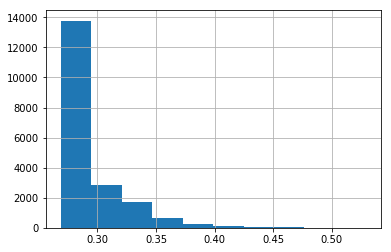

In [14]:
g = (sumbit['label']).hist()